In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
color_palette = sns.color_palette("husl")
from scipy.stats import skew
import random

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
# Check for duplicates
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [5]:
# Check for Nulls
train.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [6]:
# Check for Duplicates
train[train.duplicated()]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness


## Exploratory Data Analysis

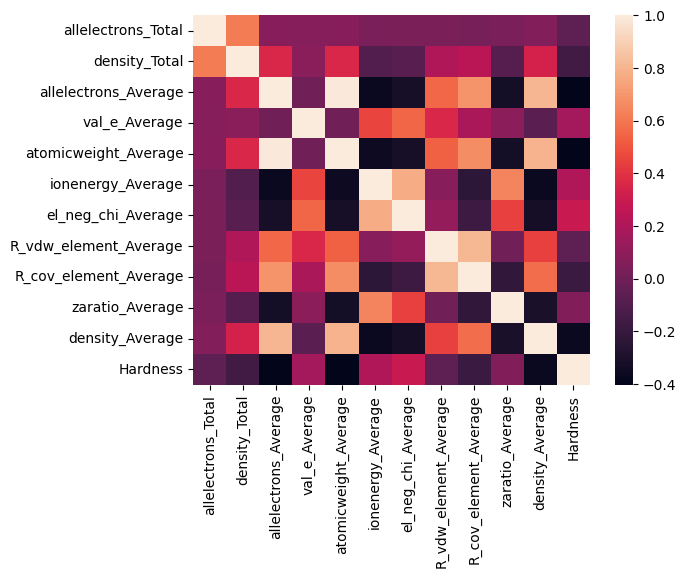

In [7]:
num_cols = [col for col in train.columns if train[col].dtype in ["float64"]]
num_train = train[num_cols]

# Create the heatmap
sns.heatmap(num_train.corr())
plt.show()

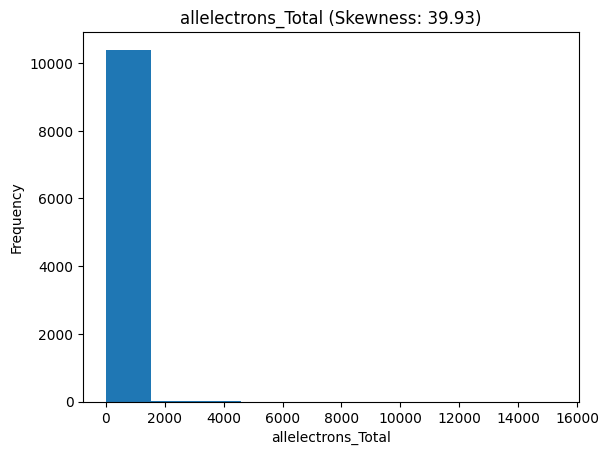

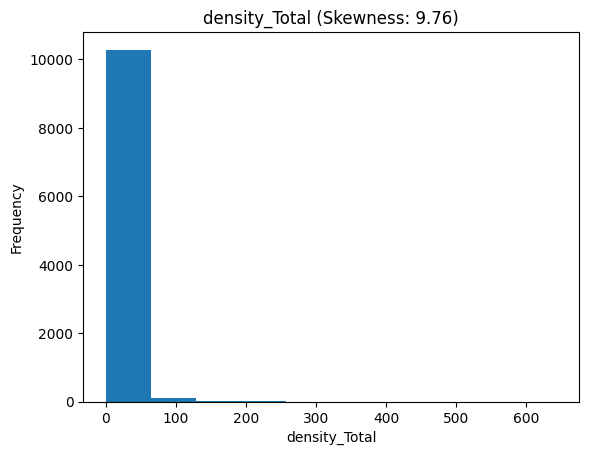

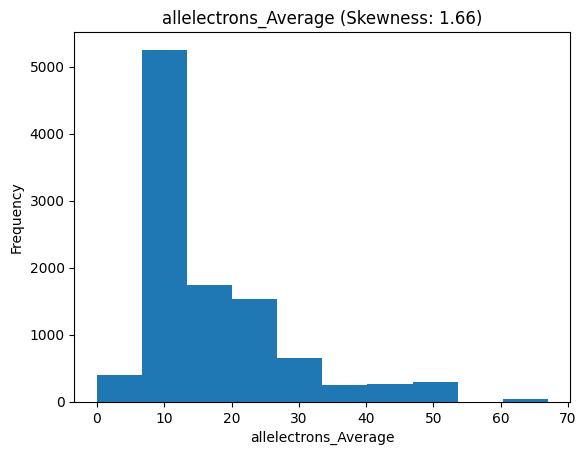

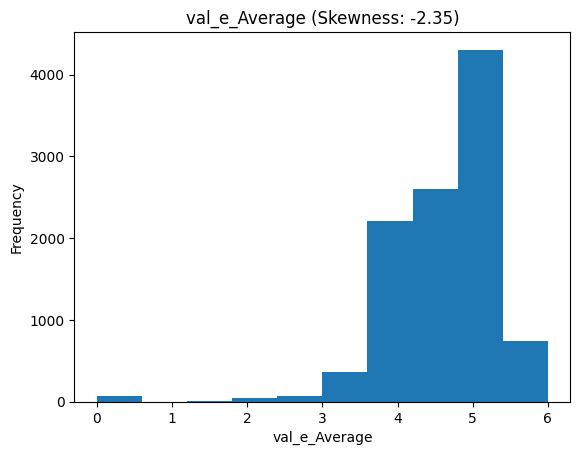

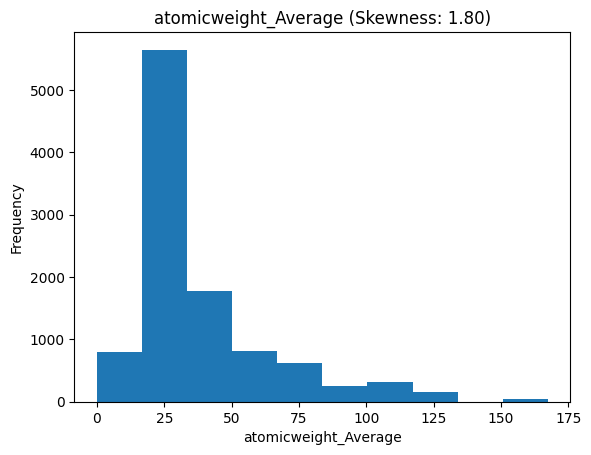

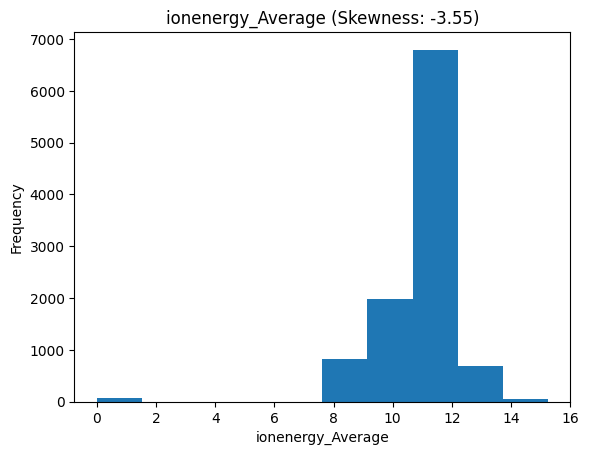

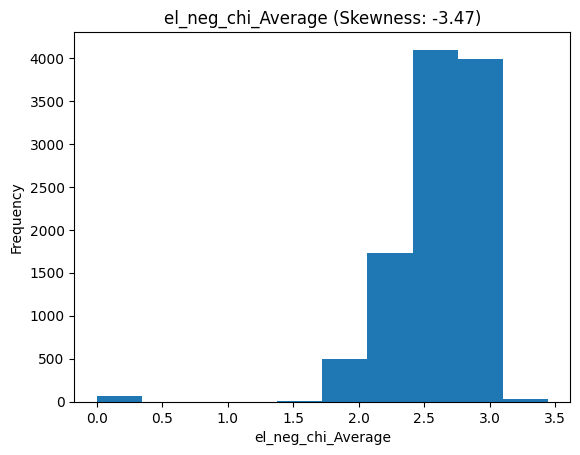

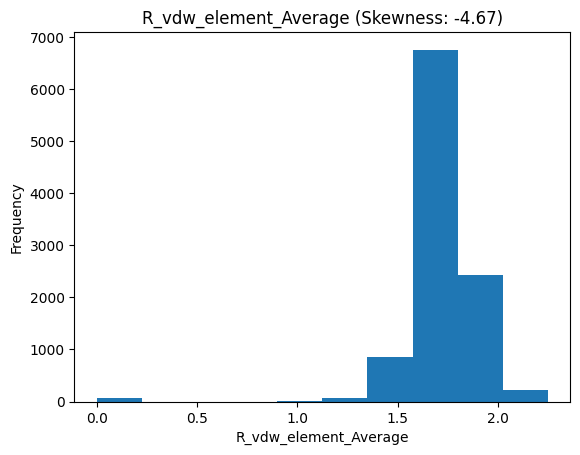

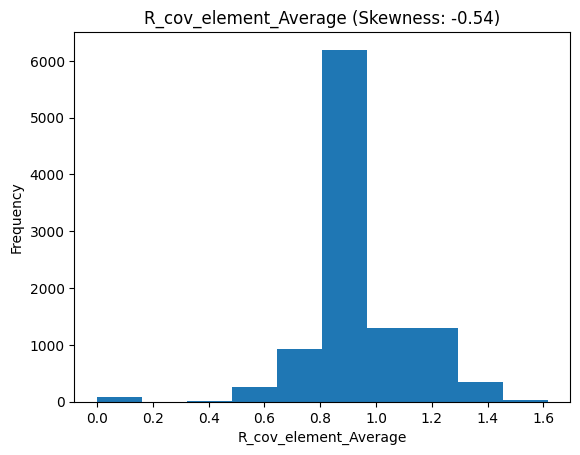

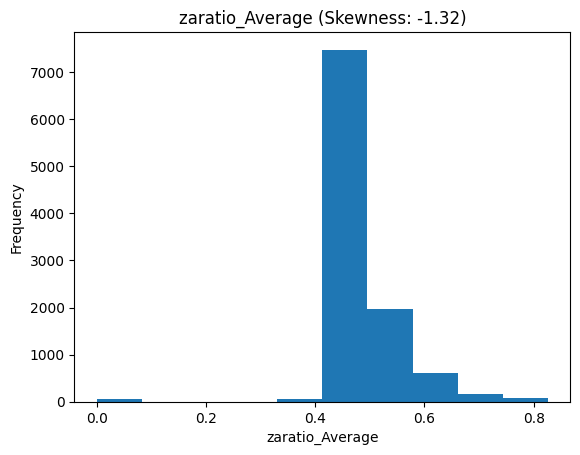

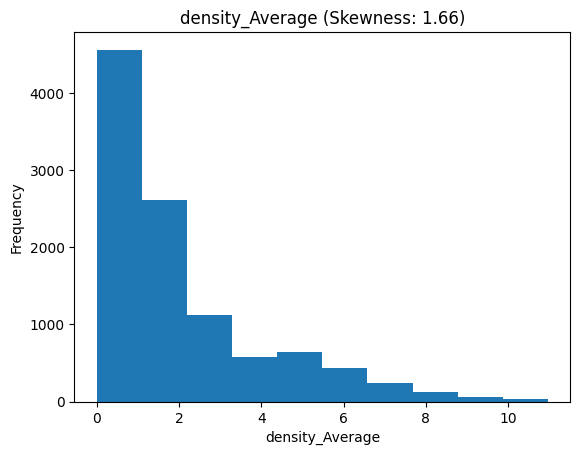

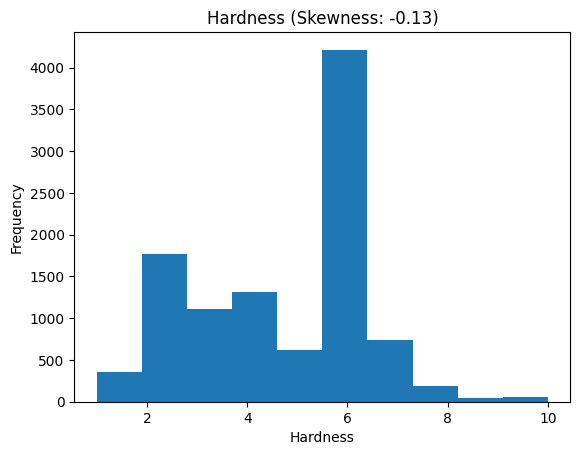

In [8]:
for col in num_cols:
    skewness = skew(train[col].dropna())  # Calculating skewness, dropping NaN values
    train[col].plot(kind='hist', bins=10)
    plt.title(f'{col} (Skewness: {skewness:.2f})')  # Adding skewness information to the title
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
y = train["Hardness"]
train.drop("Hardness", axis = 1, inplace = True)

# Median Absoulte Error (MedAE) Metric

In [10]:
def medae(y_true, y_pred):
  medae = np.median(np.abs(y_true - y_pred))
  return ("Median Absolute Error (custom):", medae)

# BASE MODEL

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size = 0.02, random_state = 42)

### Base Model Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
base_rfr = RandomForestRegressor()

base_rfr.fit(X_train, y_train)

base_rfr_preds = base_rfr.predict(X_valid)

In [15]:
base_rfr_preds_mse = mean_squared_error(y_valid, base_rfr_preds)
base_rfr_preds_rmse = np.sqrt(base_rfr_preds_mse)
base_rfr_preds_rmse

1.22352774354914

In [16]:
medae(y_valid, base_rfr_preds)

('Median Absolute Error (custom):', 0.7939999999999969)

# Data Preprocessing

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [18]:
pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "mean")),
        ("scaler", StandardScaler())
    ]
)


In [19]:
train_pp = pipeline.fit_transform(train)

In [20]:
y_pp = np.log(y)

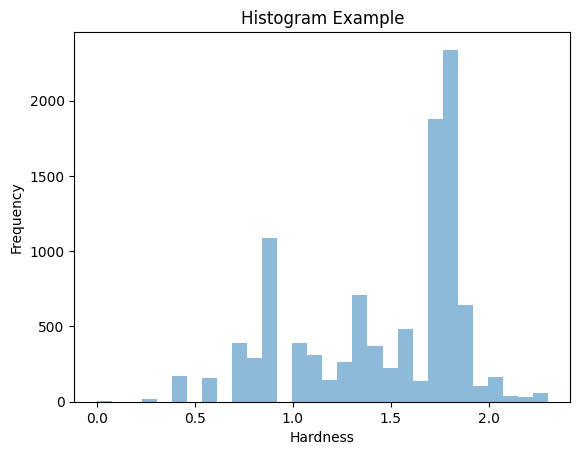

In [21]:
# Plotting the histogram
plt.hist(y_pp, bins=30, alpha=0.5)  # 'data' is the input data, 'bins' determine the number of bins, 'alpha' adjusts transparency
plt.xlabel('Hardness')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Histogram Example')  # Title of the histogram
plt.show()  # Display the histogram

# Splitting of datasets

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(train_pp, y_pp, test_size = 0.02, random_state = 42)

### Base Model Random Forest Regressor Preprocessed

In [23]:
base_rfr_pp = RandomForestRegressor()

base_rfr_pp.fit(X_train, y_train)

base_rfr_preds = base_rfr_pp.predict(X_valid)

In [24]:
base_rfr_preds_mse = mean_squared_error(y_valid, base_rfr_preds)
base_rfr_preds_rmse = np.sqrt(base_rfr_preds_mse)
base_rfr_preds_rmse

0.3047069848362473

In [25]:
medae(y_valid, base_rfr_preds)

('Median Absolute Error (custom):', 0.17597950675859475)

# Base XGBoost Regressor

In [26]:
from xgboost import XGBRegressor

In [27]:
base_xgb_model = XGBRegressor()

base_xgb_model.fit(X_train, y_train)

base_xgb_preds = base_xgb_model.predict(X_valid)

In [28]:
base_xgb_preds_mse = mean_squared_error(y_valid, base_xgb_preds)
base_xgb_preds_rmse = np.sqrt(base_xgb_preds_mse )
base_xgb_preds_rmse

0.31338205928085305

In [29]:
medae(y_valid, base_xgb_preds)

('Median Absolute Error (custom):', 0.1698473438851522)

# Hyperparameter Tuning: XGBMODEL

In [30]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [31]:
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [32]:
cv = KFold(n_splits=3, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=cv)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [33]:
best_xgb_model = XGBRegressor(learning_rate=0.1, max_depth = 5, n_estimators = 100)

best_xgb_model.fit(X_train, y_train)

best_xgb_preds = best_xgb_model.predict(X_valid)

In [34]:
best_xgb_preds_mse = mean_squared_error(y_valid, best_xgb_preds)
best_xgb_preds_rmse = np.sqrt(best_xgb_preds_mse )
best_xgb_preds_rmse

0.3023905768911247

In [35]:
medae(y_valid, best_xgb_preds)

('Median Absolute Error (custom):', 0.16298894633236238)

#PCA XGBoost

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)


In [37]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=cv)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [38]:
best_xgb_model_pca = XGBRegressor(learning_rate=0.1, max_depth = 4, n_estimators = 100)

best_xgb_model_pca.fit(X_train_pca, y_train)

best_xgb_pca_preds = best_xgb_model_pca.predict(X_valid_pca)

In [39]:
best_xgb_pca_preds_mse = mean_squared_error(y_valid, best_xgb_pca_preds)
best_xgb_pca_preds_rmse = np.sqrt(best_xgb_pca_preds_mse )
best_xgb_pca_preds_rmse

0.3491203512473247

In [40]:
medae(y_valid, best_xgb_pca_preds)

('Median Absolute Error (custom):', 0.20947818417555797)

# Making predictions using test preds and making submission files

In [41]:
## Base Model RFR

test_pp = pipeline.transform(test)

preds_rfr_pp = base_rfr_pp.predict(test_pp)

y_test_base_rfr = np.exp(preds_rfr_pp)

In [42]:
## Base Model XGB

test_pp = pipeline.transform(test)

base_xgb_model_preds = base_xgb_model.predict(test_pp)

y_test_base_xgb = np.exp(base_xgb_model_preds)

In [43]:
## tuned Model XGB

test_pp = pipeline.transform(test)

best_xgb_model_preds = best_xgb_model.predict(test_pp)

y_test_tuned_xgb = np.exp(best_xgb_model_preds)

In [44]:
# ## tuned Model XGB PCA

test_pp = pipeline.transform(test)
test_pca = pca.transform(test_pp)

best_xgb_pca_model_preds = best_xgb_model_pca.predict(test_pca)

y_test_xgb_pcaa = np.exp(best_xgb_pca_model_preds)

#Best Model

In [47]:
df_stack_out = test[['id']].copy()
df_stack_out['Hardness'] = y_test_tuned_xgb
df_stack_out.to_csv('Best_Mohs_Hardness.csv', index=False)

In [48]:
from google.colab import files
files.download('Best_Mohs_Hardness.csv')

print(df_stack_out)
print(y_test_tuned_xgb)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         id  Hardness
0     10407  2.874590
1     10408  3.034577
2     10409  5.789587
3     10410  4.405727
4     10411  4.688318
...     ...       ...
6934  17341  5.554482
6935  17342  4.152160
6936  17343  5.055841
6937  17344  4.101449
6938  17345  2.971819

[6939 rows x 2 columns]
[2.8745902 3.0345767 5.7895865 ... 5.0558414 4.1014495 2.9718187]
